UNIVERSIDADE DE SÃO PAULO (USP)

DISCIPLINA: SME-0828 - INTRODUÇÃO À CIÊNCIA DE DADOS (2023)

DOCENTE: FRANCISCO APARECIDO RODRIGUES

DISCENTE: CARLOS FILIPE DE CASTRO LEMOS (12542630)


# <CENTER>QUESTIONÁRIO 2</CENTER>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import requests as req
from bs4 import BeautifulSoup as bs

from sklearn.preprocessing import LabelEncoder

# Exercício 1

Importe os dados do link: https://www.worldometers.info/world-population/population-by-country/
Construa a matriz de correlação. Quais as variáveis menos correlacionadas?

a. Population e Density

b. Net-Change e Land Area

c. Density e Med Age

d. Population e Land Are

e. Med Age e Fert. Rate


## Importação dos dados

In [2]:
url = 'https://www.worldometers.info/world-population/population-by-country/'
table = pd.read_html(url, na_values='N.A.')[0]

## Análise Exploratória

In [3]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        234 non-null    int64  
 1   Country (or dependency)  234 non-null    object 
 2   Population  (2023)       234 non-null    int64  
 3   Yearly  Change           234 non-null    object 
 4   Net  Change              234 non-null    int64  
 5   Density  (P/Km²)         234 non-null    int64  
 6   Land Area  (Km²)         234 non-null    int64  
 7   Migrants  (net)          234 non-null    int64  
 8   Fert.  Rate              233 non-null    float64
 9   Med.  Age                233 non-null    float64
 10  Urban  Pop %             216 non-null    object 
 11  World  Share             234 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 22.1+ KB


De acordo com as respostas do exercício, precisaremos das correlações entre as colunas: "Population", "Density", "Net-Change", "Land Area", "Med Age", "Land Are" e "Fert. Rate".

In [4]:
# Selecionando as colunas de interesse:
col = ['Population  (2023)', 'Density  (P/Km²)', 'Net  Change', 'Land Area  (Km²)', 'Med.  Age', 'Fert.  Rate']
table[col]

,Population (2023),Density (P/Km²),Net Change,Land Area (Km²),Med. Age,Fert. Rate
0,1428627663,481,11454490,2973190,28.0,2.0
1,1425671352,152,-215985,9388211,39.0,1.2
2,339996563,37,1706706,9147420,38.0,1.7
3,277534122,153,2032783,1811570,30.0,2.1
4,240485658,312,4660796,770880,21.0,3.3
...,...,...,...,...,...,...
229,4386,44,-4,100,44.0,1.6
230,3791,0,11,12170,40.0,1.6
231,1935,7,1,260,36.0,2.4
232,1893,189,22,10,27.0,2.6


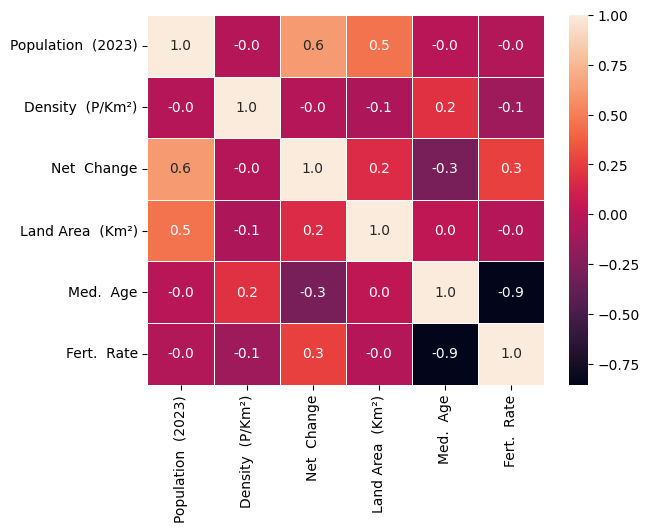

In [5]:
corr = table[col].corr()
sns.heatmap(corr, annot=True, fmt=".1f", linewidth=.6);

a. Population e Density (0.0)

b. Net-Change e Land Area (0.2)

c. Density e Med Age (0.2)

d. Population e Land Are (0.5)

e. Med Age e Fert. Rate (-0.9)

# Exercício 2

Mostre a série temporal da variável Life_Expectancy para os países: Ireland, Finland, Netherlands, Zambia, Angola.Quais são os países com maior e menor expectativas de vida em 2014?

a. Finland e Angola

b. Netherlands e Angola

c. Ireland e Finland

d. Finland e Zambia

e. Netherlands e Zambia

In [6]:
path = './data/Life Expectancy Data.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
selection = df.loc[df['Country'].isin(['Ireland','Angola','Netherlands','Finland','Zambia']), ['Country','Year','Life expectancy ']]
selection.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 48 to 2921
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           80 non-null     object 
 1   Year              80 non-null     int64  
 2   Life expectancy   80 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [9]:
# Mostrar as séries temporais
value_2014 = {}
data = {}
for c in ['Ireland','Angola','Netherlands','Finland','Zambia']:
    country = selection.loc[(selection['Country'] == c)]
    year = country['Year'].tolist()
    life = country['Life expectancy '].tolist()
    data[c] = [year, life]
    value_2014[c] = selection.loc[(selection['Country'] == c) & (selection['Year'] == 2014), 'Life expectancy '].tolist()

print(value_2014)

{'Ireland': [81.2], 'Angola': [51.7], 'Netherlands': [81.7], 'Finland': [89.0], 'Zambia': [61.1]}


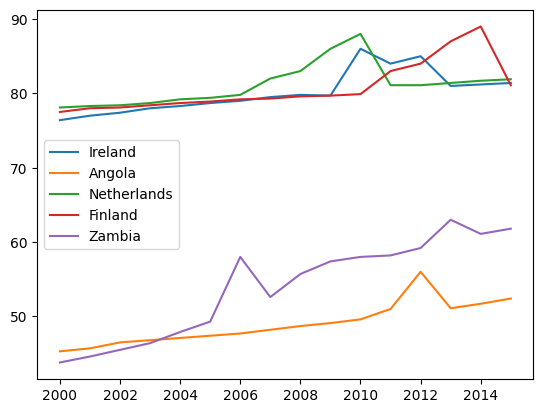

In [10]:
plt.plot(data['Ireland'][0], data['Ireland'][1], label='Ireland')
plt.plot(data['Angola'][0], data['Angola'][1], label='Angola')
plt.plot(data['Netherlands'][0], data['Netherlands'][1], label='Netherlands')
plt.plot(data['Finland'][0], data['Finland'][1], label='Finland')
plt.plot(data['Zambia'][0], data['Zambia'][1], label='Zambia')
plt.legend()
plt.show()


Pela descrição acima, podemos ver que a maior expecativa de vida em 2014 está na Finlândia (89.0) e a menor expectativa de vida na Angola (51.7).

# Exercício 3

Consirando a base ainda, construa um histograma para a variável Life_expectancy. Qual a média e variância desse atributo?

a. 45,4 e 89,4

b. 70,2 e 100,3

c. 55,4 e 99,2

d. 69,9 e 89,3

e. 69,5 e 92,9

In [11]:
df['Life expectancy '].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2938 entries, 0 to 2937
Series name: Life expectancy 
Non-Null Count  Dtype  
--------------  -----  
2928 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


In [12]:
df['Life expectancy '].isna().sum()

10

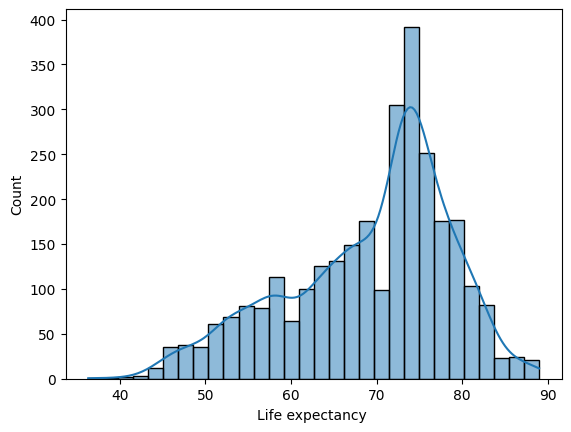

In [13]:
sns.histplot(df['Life expectancy '], kde=True);

A distribuição não assume a forma normal. Por isso, precisamos utilizar o valor da mediana para poder preencher os dados NaN.

In [14]:
median = np.nanmedian(df['Life expectancy '])
df['Life expectancy '].fillna(median)

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

In [15]:
np.mean(df['Life expectancy '])

69.22493169398908

In [16]:
np.var(df['Life expectancy '])

90.67307376582609

# Exercício 4

Faça um boxplot para a variável Schooling. Considere os países: 'Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola'. Em termos da mediana, qual deles apresenta maior nível de escolaridade?


a. Ireland

b. Netherlands

c. Zambia

d. Finland

e. Angola

In [17]:
# Selecionando os dados de interesse
selection = df.loc[df['Country'].isin(['Ireland','Angola','Netherlands','Finland','Zambia']), ['Country','Schooling']]
selection.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 48 to 2921
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    80 non-null     object 
 1   Schooling  80 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


<Axes: xlabel='Schooling', ylabel='Country'>

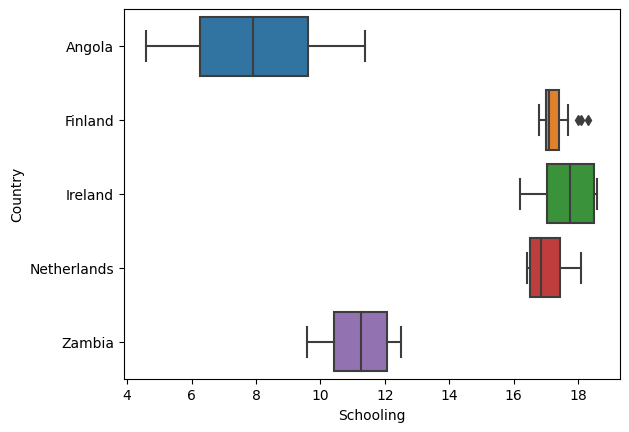

In [18]:
sns.boxplot(y=selection['Country'], x=selection['Schooling'])

# Exercício 5

Leia os dados do seguinte link:

https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a

Construa um gráfico de setores (pizza) para a variável Status. Qual a porcentagem de países desenvolvidos?

a. 25,4%

b. 45,4%

c. 11,5%

d. 18,2%

e. 81,8%

## Importanto Dados

In [19]:
url = 'https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a'
table = pd.read_html(url, na_values='N.A.')[0]

## Construindo o Gráfico de Pizza para Status

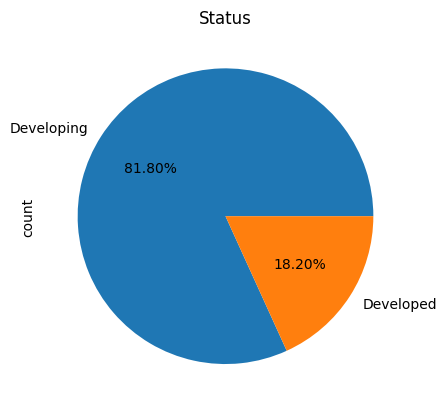

In [20]:
table['Status'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Status')
plt.yticks([])
plt.xticks([])
plt.show()